In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [25]:
df = pd.read_csv("data/knn/data-knn-2024-04-01.csv")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101519 entries, 0 to 101518
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        101519 non-null  float64
 1   id_mls                    101519 non-null  object 
 2   bathrooms_total           101519 non-null  float64
 3   bedrooms_extra            101519 non-null  float64
 4   bedrooms                  101519 non-null  float64
 5   stories_total             101519 non-null  float64
 6   size_interior             101519 non-null  float64
 7   building_type             101519 non-null  object 
 8   agency_name               101519 non-null  object 
 9   agency_type               101519 non-null  object 
 10  property_type             101519 non-null  object 
 11  lng                       101519 non-null  float64
 12  lat                       101519 non-null  float64
 13  ownership_type            101519 non-null  o

In [27]:
df["province"].value_counts()

province
Ontario                    36055
Quebec                     21029
British Columbia           20820
Alberta                    12258
Saskatchewan                3973
Manitoba                    2661
Nova Scotia                 2262
New Brunswick               1312
Newfoundland & Labrador      533
Prince Edward Island         472
Yukon                         93
Northwest Territories         51
Name: count, dtype: int64

In [28]:
df["province"].value_counts()

province
Ontario                    36055
Quebec                     21029
British Columbia           20820
Alberta                    12258
Saskatchewan                3973
Manitoba                    2661
Nova Scotia                 2262
New Brunswick               1312
Newfoundland & Labrador      533
Prince Edward Island         472
Yukon                         93
Northwest Territories         51
Name: count, dtype: int64

In [29]:
# df = df.drop(["id", "id_mls", "agency_name", "agency_type", "property_type", "ownership_type", "land_size", "page_url", "timestamp", "postal_code"], axis=1)
# df.info()

In [30]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       36055.0
mean       951979.0
std        666793.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1099900.0
max      40561615.0
Name: price, dtype: float64

## Removing Interior Size Outliers from top

<Axes: title={'center': 'size_interior'}, xlabel='province'>

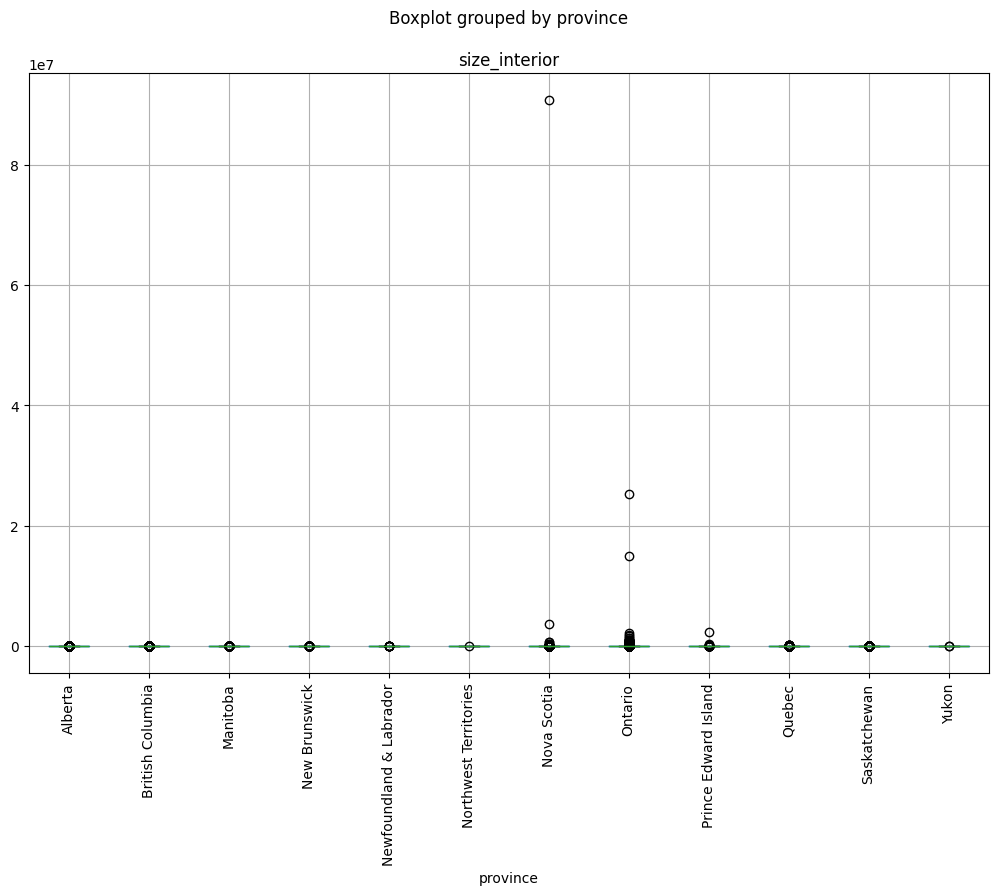

In [31]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [32]:
q0 = 0
# q1 = df["size_interior"].quantile(0.1)
q25 = df["size_interior"].quantile(0.25)
q75 = df["size_interior"].quantile(0.75)
iqr = q75 - q25

df = df[(df["size_interior"]>=abs(q25-q0)*0.33) & (df["size_interior"] < (q75+1.5*iqr))]

In [33]:
abs(q25-q0)*0.33

365.2908473445

<Axes: title={'center': 'size_interior'}, xlabel='province'>

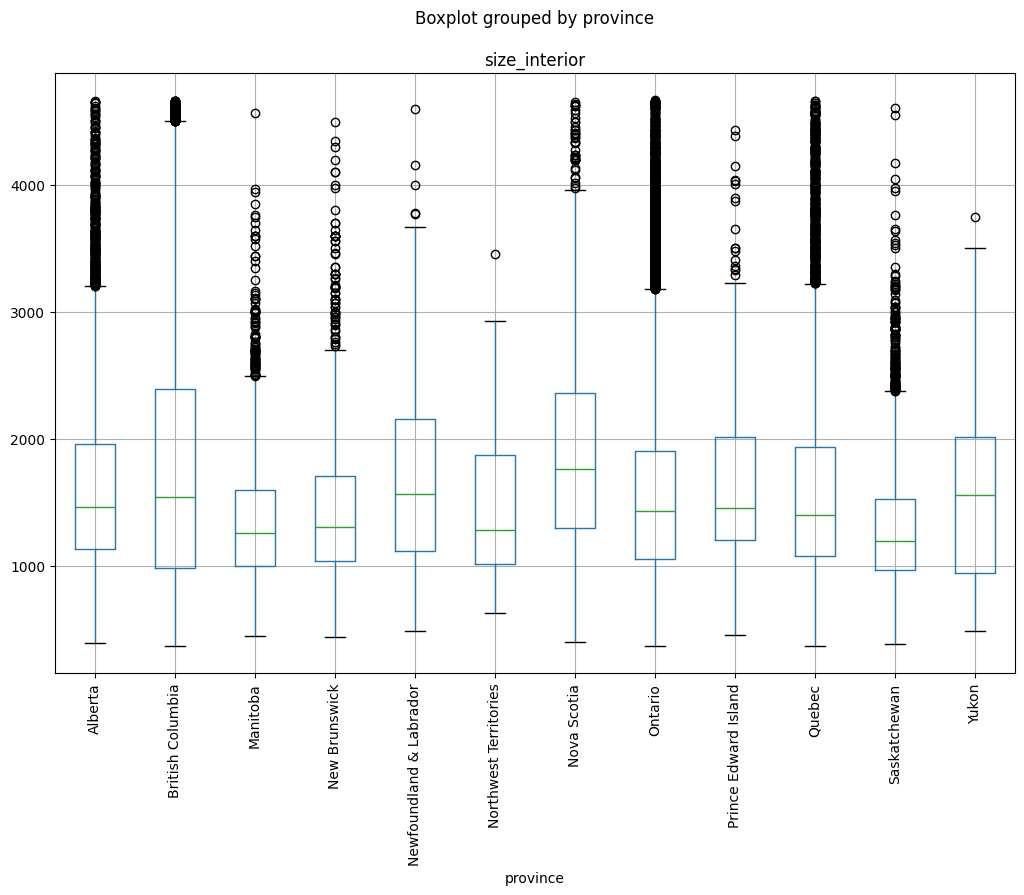

In [34]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

<Axes: title={'center': 'price'}, xlabel='province'>

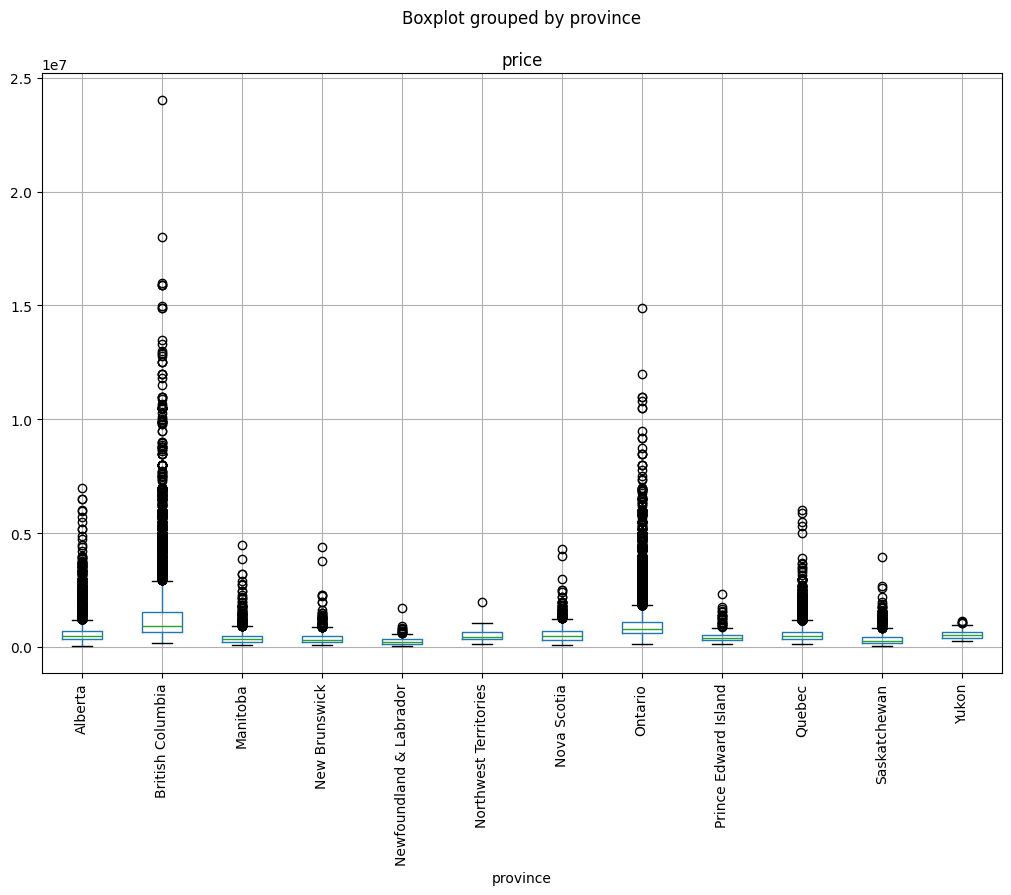

In [35]:
df.boxplot(column="price", by="province", figsize=(12,8), rot=90)

In [36]:
df["province"].value_counts()

province
Ontario                    34386
British Columbia           19908
Alberta                    12201
Quebec                      8216
Saskatchewan                3969
Manitoba                    2659
Nova Scotia                 1978
New Brunswick               1302
Newfoundland & Labrador      529
Prince Edward Island         413
Yukon                         92
Northwest Territories         51
Name: count, dtype: int64

In [37]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       34386.0
mean       951302.0
std        613578.0
min        159900.0
25%        599900.0
50%        799900.0
75%       1099900.0
max      14888000.0
Name: price, dtype: float64

In [38]:
from sklearn.neighbors import LocalOutlierFactor

In [39]:
lof = LocalOutlierFactor(n_neighbors=30)
lof_labels = lof.fit_predict(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])

df = df[lof_labels==1]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77455 entries, 0 to 101518
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        77455 non-null  float64
 1   id_mls                    77455 non-null  object 
 2   bathrooms_total           77455 non-null  float64
 3   bedrooms_extra            77455 non-null  float64
 4   bedrooms                  77455 non-null  float64
 5   stories_total             77455 non-null  float64
 6   size_interior             77455 non-null  float64
 7   building_type             77455 non-null  object 
 8   agency_name               77455 non-null  object 
 9   agency_type               77455 non-null  object 
 10  property_type             77455 non-null  object 
 11  lng                       77455 non-null  float64
 12  lat                       77455 non-null  float64
 13  ownership_type            77455 non-null  object 
 14  ownership_

In [41]:
df["province"].value_counts()

province
Ontario                    32102
British Columbia           18114
Alberta                    10958
Quebec                      6869
Saskatchewan                3513
Manitoba                    2378
Nova Scotia                 1597
New Brunswick               1137
Prince Edward Island         342
Newfoundland & Labrador      318
Yukon                         81
Northwest Territories         46
Name: count, dtype: int64

In [42]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       32102.0
mean       952304.0
std        603868.0
min        169900.0
25%        599900.0
50%        799900.0
75%       1100000.0
max      11995000.0
Name: price, dtype: float64

In [17]:
# df.to_csv("data/lof/data-lof-2024-04-01.csv", index=False)